# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrUa-2020-07-14.zip
unzip autoriaNumberplateOcrUa-2020-07-14.zip
mv autoriaNumberplateOcrUa-2020-07-14 ua
```
or use your own dataset.

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "ua"
VERSION = "2020_12_22_tensorflow_v2a"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [3]:
class eu_ua_2004_2015(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", "K", "M", "O", "P", "T", "X"]
        
        self.EPOCHS = 3

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'1', '8', 'T', 'E', '3', 'K', '7', '4', 'I', 'A', 'X', 'B', '0', 'P', 'M', '9', 'H', '6', 'O', '5', '2', 'C'}
Letters val  {'1', '8', 'T', 'E', 'K', '3', '7', '4', 'I', 'A', 'X', 'B', '0', 'P', 'M', '9', 'H', '6', 'O', '5', '2', 'C'}
Letters test  {'1', '8', 'T', 'K', 'E', '3', '7', '4', 'I', 'A', 'X', 'B', '0', 'P', 'M', '9', 'H', '6', 'O', '5', '2', 'C'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


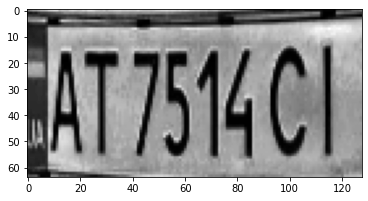

2) the_labels (plate number): AT7514CI is encoded as [10, 20, 7, 5, 1, 4, 12, 15]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED


In [4]:
ocrTextDetector = eu_ua_2004_2015()
model = ocrTextDetector.prepare(PATH_TO_DATASET)

In [5]:
model = ocrTextDetector.train(is_random=1)


START TRAINING
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu_ua_2004_2015 (Inpu [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu_ua_2004_2015[0][0]  
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
______________________________________________________________________________

In [6]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 AA5557M
True: 			 AA5557MM

Predicted: 		 AA6935TO
True: 			 AA6935TX

Predicted: 		 KA6973AC
True: 			 KA6973AO

Predicted: 		 AO7026BO
True: 			 AC7026BO

Predicted: 		 AC2846AP
True: 			 AC2046AP

Predicted: 		 BK0695CI
True: 			 BK0695CA

Predicted: 		 KA0001OCM
True: 			 KA0001OM

Predicted: 		 BO46455BB
True: 			 BO4455BB

Predicted: 		 AP832CA
True: 			 AM1031CA
Test processing time: 7.620281457901001 seconds
acc: 0.988984088127295


In [7]:
#VERSION = "2020_08_26_tensorflow_v2"

In [8]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /var/www/nomeroff-net/models/anpr_ocr_ua_2020_12_22_tensorflow_v2a.h5


GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'1', '8', 'T', 'E', '3', 'K', '7', '4', 'I', 'A', 'X', 'B', '0', 'P', 'M', '9', 'H', '6', 'O', '5', '2', 'C'}
Letters val  {'1', '8', 'T', 'E', 'K', '3', '7', '4', 'I', 'A', 'X', 'B', '0', 'P', 'M', '9', 'H', '6', 'O', '5', '2', 'C'}
Letters test  {'1', '8', 'T', 'K', 'E', '3', '7', '4', 'I', 'A', 'X', 'B', '0', 'P', 'M', '9', 'H', '6', 'O', '5', '2', 'C'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


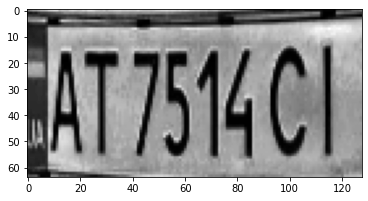

2) the_labels (plate number): AT7514CI is encoded as [10, 20, 7, 5, 1, 4, 12, 15]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 8
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_eu_ua_2004_2015 (Inpu [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_eu_ua_2004_2015[0][0]  
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
________________________________

In [ ]:
# Train with aug
for i in range(7,10):
    ocrTextDetector = eu_ua_2004_2015()
    ocrTextDetector.EPOCHS = 2

    model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

    model = ocrTextDetector.train(load_last_weights=True)
    
    ocrTextDetector.test(verbose=True)

    ocrTextDetector.save(os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}_{}.h5'.format(DATASET_NAME, VERSION, i)), verbose=True)

In [17]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 AA5557M
True: 			 AA5557MM

Predicted: 		 AA0145PK
True: 			 AA0145PX

Predicted: 		 AO7026BO
True: 			 AC7026BO

Predicted: 		 AC2846AP
True: 			 AC2046AP

Predicted: 		 AA9674KT
True: 			 AA9674KX

Predicted: 		 KA5577CH
True: 			 KA5517CA

Predicted: 		 AP1833CI
True: 			 AM1031CA
Test processing time: 0.22806787490844727 seconds
acc: 0.9914320685434517


In [11]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_ua_2020_08_21_tensorflow_v2.h5


In [5]:
ocrTextDetector.load('/var/www/nomeroff-net/models/anpr_ocr_ua_2020_12_22_tensorflow_v2a_5.h5', verbose=False) 